# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create test list for cities to work code
# cities = ["London", "New York", "Awstin", "Paris", "Arlington"]

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create list 
data = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        country = response["sys"]["country"]
        cloudiness = response["clouds"]["all"]
        date = response["dt"]
        humidity = response ["main"]["humidity"]
        temp = response["main"]["temp_max"]
        speed = response["wind"]["speed"]
        data.append({"Cities": city, 
                     "Latitude": lat,
                     "Longitude": lon,
                     "Country": country, 
                     "Cloudiness": cloudiness, 
                     "Date": date, 
                     "Humidity": humidity,
                     "Max Temperature": temp, 
                     "Wind Speed": speed})
    except: 
        print("City not found. Skipping...")
    
#use a try except
    
print(data)

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
dataframe = pd.DataFrame(data)
dataframe.count()

#print datafame
# dataframe.head()

Cities             541
Cloudiness         541
Country            541
Date               541
Humidity           541
Latitude           541
Longitude          541
Max Temperature    541
Wind Speed         541
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

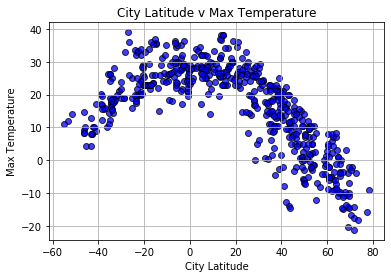

In [12]:
latitude = dataframe["Latitude"]
temperature = dataframe["Max Temperature"]

#create scatter plot and format
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude v Max Temperature")

plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

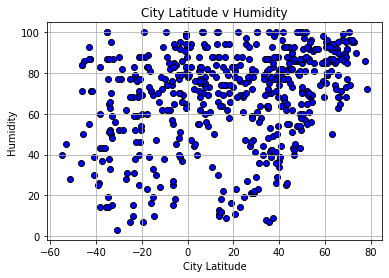

In [16]:
latitude = dataframe["Latitude"]
humidity = dataframe["Humidity"]

# create scatter plot and format
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude v Humidity")

plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

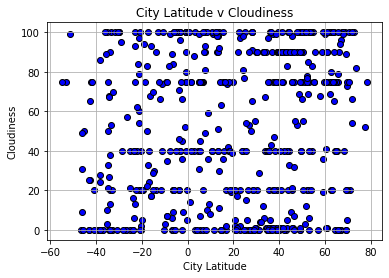

In [17]:
latitude = dataframe["Latitude"]
clouds = dataframe["Cloudiness"]

# create scatter plot and format
plt.scatter(latitude, clouds, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude v Cloudiness")

plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

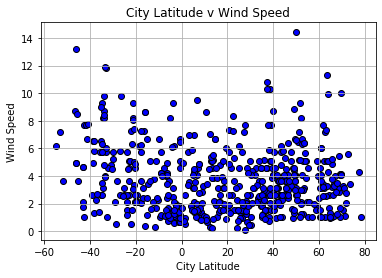

In [18]:
latitude = dataframe["Latitude"]
wind_speed = dataframe["Wind Speed"]

# create scatter plot and format
plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude v Wind Speed")

plt.savefig("latitude_wind.png")